# Problem 1. Use CIFAR10 dataset for CNN classification and write a python code.

1. Use the following source: keras.datasets.cifar10
2. Try different number of neurons (efficient code requires low computational cost (less number of neurons with higher accuracy)),
3. You should be capable of accessing the NN weights and biases
4. Try different types of optimizers
5. Plot the training loss, training accuracy, validation loss, and validation accuracy,

6. Implement an EarlyStopping and save the model at a checkpoint (similar to Problem 1),
   - to implement EarlyStopping and save model at a checkpoint when
     - no progress has been acheived and/or
     - overfitting has been observed.
7. Save the model.
8. Restore the model,
9. Add more metrics that can be helpful to the customer/reader.




## Installs and imports

Install and import TensorFlow and dependencies:

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format
!pip install texttable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(25) # For generating same random values

print(tf.version.VERSION)

2.8.2


In [ ]:
from functools import partial
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, UpSampling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from sklearn import metrics
from sklearn.metrics import classification_report
from keras.models import Model, load_model

### Importing CIFAR10 Dataset

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


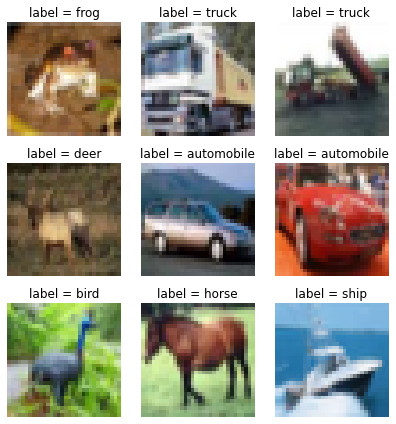

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ROW = 3
COLUMN = 3
plt.figure(figsize=(6, 6)) 
for i in range(ROW * COLUMN):
    image = x_train[i] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, interpolation='nearest')  
    plt.title('label = {}'.format(classes[y_train[i][0]]))
    plt.axis('off')
    plt.tight_layout()   
    
plt.show()

Image (#1902): Which is label number '[7]', or label 'horse''


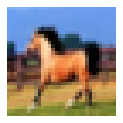

In [ ]:
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(each, interpolation='nearest')
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], classes[y_train[sample][0]]))

In [ ]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train /= 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test /= 255.0

train_images = x_train
test_images = x_test
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# One hot encode the outcome 
num_classes = len(classes)

#y_train = y_train.flatten()
#y_test = y_test.flatten()
# Converts a class vector (integers) to binary class matrix.   
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

#y_train_tf = y_train
#y_test_tf = y_test

print(y_train_tf.shape)

(50000, 10)


### Defining models

 Almost 30 CNN architectures were tested and out of which, 3 models were chosen to make the comparisons for 

*   Accuracy of the model -- Both on training and tesing dataset
*   Prediction performance



## Three steps to Convolution
 1. Convolution
 2. Activation
 3. Pooling
* Repeat Steps 1,2,3 for adding more hidden layers

 4. After that make a fully connected network

### This fully connected network gives ability to the CNN  to classify the samples

#### Model 1 -- Simple CNN architecture with 
* Max Pooling - This will reduce the dimensionality of each feature, which reduces the number of parameters that the model needs to learn, which shortens training time
*  Dropout layers - This fights overfitting and forces the model to learn multiple representations of the same data by randomly disabling neurons 
in the learning phase.
* Final layer with 10 outputs and a softmax activation. Softmax activation 
 enables me to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.


In [ ]:
# Define a simple sequential model for CNN
def create_model_1():
 

 # We start with a convolutional layer this will extract features from 
# the input images by sliding a convolution filter over the input image, 
# resulting in a feature map

 model_1 = Sequential()


 model_1.add(Conv2D(32, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
 model_1.add(MaxPooling2D(pool_size=(2, 2)))
 model_1.add(Dropout(0.3))

 model_1.add(Conv2D(64, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
 model_1.add(MaxPooling2D(pool_size=(2, 2)))
 model_1.add(Dropout(0.3))

 model_1.add(Conv2D(128, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
 model_1.add(MaxPooling2D(pool_size=(2, 2)))
 model_1.add(Dropout(0.4))

 model_1.add(Flatten())
 model_1.add(Dense(80, activation='relu'))
 model_1.add(Dropout(0.3))

 
 model_1.add(Dense(y_train_tf.shape[1], activation='softmax'))


 model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=l_r), metrics=['accuracy'])   # Will be using adam optimizer

 return model_1

In [ ]:
input_shape = (32, 32, 3)
l_r = 0.001
weight_decay = 1e-4

#### Model 2 -- CNN architecture with Max Pooling, Dropout layers, Batch normalization and Kernel regularization


In [ ]:
# Define a simple sequential model for CNN
def create_model_2():
 
 model_2 = Sequential()
 
 model_2.add(Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay), input_shape=input_shape))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.2))
 
 model_2.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.3))
 
 model_2.add(Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.4))
 
 model_2.add(Flatten())
 model_2.add(Dense(y_train_tf.shape[1], activation='softmax'))
 

 model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=l_r), metrics=['accuracy'])

 return model_2


#### Model 3 -- CNN architecture with Max Pooling, Dropout layers, Batch normalization and Kernel regularization (With more number of neurons)


In [ ]:
# Define a simple sequential model for CNN
def create_model_3():
 model_3 = Sequential()



 model_3.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
 model_3.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_3.add(BatchNormalization())
 model_3.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_3.add(Dropout(0.45)) 

 model_3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_3.add(BatchNormalization())
 model_3.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_3.add(Dropout(0.45)) 

 model_3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
 model_3.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_3.add(BatchNormalization())
 model_3.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_3.add(Dropout(0.45)) 

 model_3.add(Flatten())
 model_3.add(Dense(256, activation='relu'))
 model_3.add(Dropout(0.5))
 model_3.add(Dense(300, activation='relu'))
 model_3.add(Dropout(0.5))
 model_3.add(Dense(y_train_tf.shape[1], activation='softmax'))


 model_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=l_r), metrics=['accuracy'])

 return model_3

In [ ]:
# Creating models
model_1 = create_model_1()
model_2 = create_model_2()
model_3 = create_model_3()


In [ ]:
# Display the model's architecture
print(model_1.summary())
print(model_2.summary())
print(model_3.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 6, 6, 64)         

## Save checkpoints during training

####  Creating a `ModelCheckpoint` callback that saves weights only during training and `EarlyStopping` callback to save the model once conditions are met 

In [ ]:
checkpoint_path_1 = "training_2_m1/cp.ckpt"
checkpoint_dir_1 = os.path.dirname(checkpoint_path_1)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path_1,
                                                 save_weights_only=True,
                                                 verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience = 10, verbose=1, mode='auto')



# Train the model with the new callback
history_1 = model_1.fit(train_images, 
          y_train_tf,  
          validation_split = 0.2,
          verbose=1,
          epochs=100,
          batch_size=128, 
          callbacks=[cp_callback,es],  # Pass callback to training
          shuffle= True) 

Epoch 1/100
309/313 [============================>.] - ETA: 0s - loss: 1.9526 - accuracy: 0.2658
Epoch 1: saving model to training_2_m1/cp.ckpt
313/313 [==============================] - 3s 9ms/step - loss: 1.9502 - accuracy: 0.2669 - val_loss: 1.6236 - val_accuracy: 0.4135
Epoch 2/100
309/313 [============================>.] - ETA: 0s - loss: 1.5807 - accuracy: 0.4204
Epoch 2: saving model to training_2_m1/cp.ckpt
313/313 [==============================] - 3s 8ms/step - loss: 1.5795 - accuracy: 0.4209 - val_loss: 1.4097 - val_accuracy: 0.4962
Epoch 3/100
307/313 [============================>.] - ETA: 0s - loss: 1.4454 - accuracy: 0.4749
Epoch 3: saving model to training_2_m1/cp.ckpt
313/313 [==============================] - 3s 11ms/step - loss: 1.4443 - accuracy: 0.4753 - val_loss: 1.2969 - val_accuracy: 0.5422
Epoch 4/100
307/313 [============================>.] - ETA: 0s - loss: 1.3711 - accuracy: 0.5048
Epoch 4: saving model to training_2_m1/cp.ckpt
313/313 [=====================

In [ ]:
checkpoint_path_2 = "training_2_m2/cp.ckpt"
checkpoint_dir_2 = os.path.dirname(checkpoint_path_2)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path_2,
                                                 save_weights_only=True,
                                                 verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience = 10, verbose=1, mode='auto')



# Train the model with the new callback
history_2 = model_2.fit(train_images, 
          y_train_tf,  
          validation_split = 0.2,
          verbose=1,
          epochs=100,
          batch_size=128, 
          callbacks=[cp_callback,es],
          shuffle= True) 

Epoch 1/100
312/313 [============================>.] - ETA: 0s - loss: 1.9819 - accuracy: 0.4110
Epoch 1: saving model to training_2_m2/cp.ckpt
313/313 [==============================] - 7s 18ms/step - loss: 1.9816 - accuracy: 0.4110 - val_loss: 3.4004 - val_accuracy: 0.1404
Epoch 2/100
313/313 [==============================] - ETA: 0s - loss: 1.3518 - accuracy: 0.5728
Epoch 2: saving model to training_2_m2/cp.ckpt
313/313 [==============================] - 5s 18ms/step - loss: 1.3518 - accuracy: 0.5728 - val_loss: 1.1637 - val_accuracy: 0.6269
Epoch 3/100
310/313 [============================>.] - ETA: 0s - loss: 1.1091 - accuracy: 0.6473
Epoch 3: saving model to training_2_m2/cp.ckpt
313/313 [==============================] - 5s 17ms/step - loss: 1.1094 - accuracy: 0.6474 - val_loss: 0.9860 - val_accuracy: 0.6834
Epoch 4/100
310/313 [============================>.] - ETA: 0s - loss: 0.9515 - accuracy: 0.6961
Epoch 4: saving model to training_2_m2/cp.ckpt
313/313 [===================

In [ ]:
checkpoint_path_3 = "training_2_m3/cp.ckpt"
checkpoint_dir_3 = os.path.dirname(checkpoint_path_3)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path_3,
                                                 save_weights_only=True,
                                                 verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience = 10, verbose=1, mode='auto')

# Train the model with the new callback
history_3 = model_3.fit(train_images, 
          y_train_tf,  
          validation_split = 0.2,
          verbose=1,
          epochs=100,
          batch_size=128, 
          callbacks=[cp_callback,es],
          shuffle= True) 

Epoch 1/100
311/313 [============================>.] - ETA: 0s - loss: 2.5964 - accuracy: 0.2445
Epoch 1: saving model to training_2_m3/cp.ckpt
313/313 [==============================] - 11s 31ms/step - loss: 2.5951 - accuracy: 0.2451 - val_loss: 3.2192 - val_accuracy: 0.1190
Epoch 2/100
311/313 [============================>.] - ETA: 0s - loss: 2.0404 - accuracy: 0.4095
Epoch 2: saving model to training_2_m3/cp.ckpt
313/313 [==============================] - 9s 29ms/step - loss: 2.0400 - accuracy: 0.4096 - val_loss: 2.1699 - val_accuracy: 0.3603
Epoch 3/100
311/313 [============================>.] - ETA: 0s - loss: 1.7571 - accuracy: 0.5123
Epoch 3: saving model to training_2_m3/cp.ckpt
313/313 [==============================] - 9s 29ms/step - loss: 1.7565 - accuracy: 0.5125 - val_loss: 1.7039 - val_accuracy: 0.5122
Epoch 4/100
311/313 [============================>.] - ETA: 0s - loss: 1.5485 - accuracy: 0.5762
Epoch 4: saving model to training_2_m3/cp.ckpt
313/313 [==================

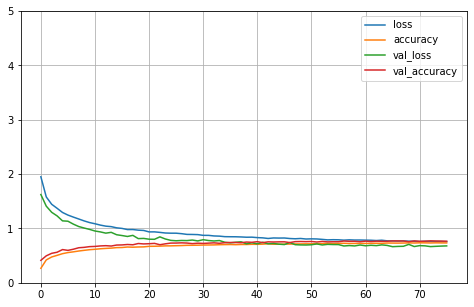

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)  
plt.show()

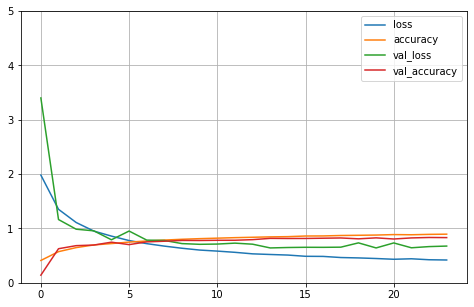

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)  
plt.show()

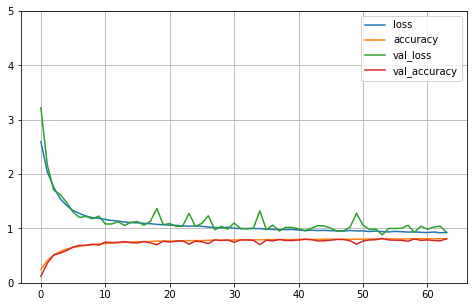

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)  
plt.show()

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [ ]:
os.listdir(checkpoint_dir_1)
os.listdir(checkpoint_dir_2)
os.listdir(checkpoint_dir_3)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [ ]:
print("Validation accuracy of Model 1 is: {:5.2f}%".format(100*history_1.history['val_accuracy'][-1]))
print("Validation value accuracy of Model 2 is: {:5.2f}%".format(100*history_2.history['val_accuracy'][-1]))
print("Validation value accuracy of Model 3 is: {:5.2f}%".format(100*history_3.history['val_accuracy'][-1]))

Validation accuracy of Model 1 is: 76.47%
Validation value accuracy of Model 2 is: 83.14%
Validation value accuracy of Model 3 is: 81.05%


## Due to highest value accuracy obtained among the three models, Model 2 is selected. 

### This shows that


*   Large number of neurons does not always mean higher accuracy. 
*   Large number of layers does not always mean higher accuracy. 



In [ ]:
# Save the entire model to a HDF5 file and save the model with higher accuracy 
#model_1.save('CNN_cifar10_m1_2.h5') 
model_2.save('CNN_cifar_m2_2.h5') 
#model_3.save('CNN_cifar10_m3_2.h5') 

As long as two models share the same architecture you can share weights between them. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights. 

Now rebuild a fresh, untrained model and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

In [ ]:
# Create a basic model instance
model_new = create_model_2()  

# Evaluate the model
loss_new, acc_new = model_new.evaluate(test_images, y_test_tf, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc_new))


313/313 - 1s - loss: 2.3408 - accuracy: 0.1001 - 1s/epoch - 4ms/step
Untrained model, accuracy: 10.01%


### Loading the weights from the checkpoint of the best model (high accuracy) and re-evaluating

In [ ]:
# Loads the weights
model_2.load_weights(checkpoint_path_2)

# Re-evaluate the model
loss, acc = model_2.evaluate(test_images, y_test_tf, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.6932 - accuracy: 0.8212 - 1s/epoch - 3ms/step
Restored model, accuracy: 82.12%


### Get Model Predictions for test data

In [ ]:
# Get Model Predictions for test data
# Predict the values from the validation dataset
y_pred = model_2.predict(test_images)
print(y_pred)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
print(y_pred_classes)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_tf,axis = 1)
print(y_true)


[[1.6864435e-05 5.7641519e-05 2.1879682e-03 ... 1.3366990e-06
  2.2449506e-04 7.9248025e-07]
 [3.7074435e-07 3.9202446e-06 2.6802805e-11 ... 8.9652032e-16
  9.9999571e-01 3.2287577e-08]
 [2.6672718e-04 2.2960212e-02 3.8723470e-06 ... 1.3380998e-05
  9.7445774e-01 2.0760447e-03]
 ...
 [2.6601132e-09 5.8052807e-09 1.8843027e-06 ... 3.1855935e-04
  1.4918390e-08 4.5157282e-07]
 [4.6281978e-03 9.3512189e-01 1.3065286e-03 ... 3.1451652e-06
  4.7326928e-05 3.1568730e-04]
 [2.7331651e-10 2.8782499e-09 2.0543330e-10 ... 9.9999702e-01
  2.7047148e-14 6.0571387e-12]]
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


In [ ]:
np.array(classes)[y_pred_classes]

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [ ]:
np.array(classes)[y_true]

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

### Loading/Restoring the best saved model for prediction 

In [ ]:
model_new_2 = tf.keras.models.load_model("CNN_cifar10_m2_2.h5")

loss_new_2, acc_new_2 = model_new_2.evaluate(test_images, y_test_tf, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc_new_2))


313/313 - 1s - loss: 0.7336 - accuracy: 0.8248 - 1s/epoch - 4ms/step
Restored model, accuracy: 82.48%


In [ ]:
# Get Model Predictions for test data
# Predict the values from the validation dataset
y_pred_new = model_new_2.predict(test_images)
print(y_pred_new)
# Convert predictions classes to one hot vectors 
y_pred_classes_new = np.argmax(y_pred_new,axis = 1)   #Taking 7 data points from predicted images
print(y_pred_classes_new)
# Convert validation observations to one hot vectors
y_true_new = np.argmax(y_test_tf,axis = 1)   #Taking 7 data points from actual images
print(y_true_new)

[[6.1498399e-06 4.8029551e-07 1.7268037e-06 ... 4.3910578e-08
  9.1059228e-08 1.5626934e-08]
 [1.0459859e-06 1.4217940e-05 3.3364155e-11 ... 1.6676294e-13
  9.9998474e-01 5.2317570e-11]
 [1.3156631e-06 6.7350944e-03 1.3573266e-05 ... 8.4804725e-08
  9.9300981e-01 6.4097439e-05]
 ...
 [8.7426599e-10 2.2752616e-11 4.0488680e-06 ... 1.6899115e-06
  1.4856393e-10 2.2587045e-08]
 [7.6663014e-03 9.6678382e-01 7.7306628e-05 ... 1.2502784e-04
  1.7008593e-05 1.4472839e-02]
 [4.2956233e-10 9.2910005e-07 6.0075230e-08 ... 9.8926455e-01
  6.5625669e-12 9.5401825e-11]]
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


### Comparing the predicted vs actual data and observing the performance of the trained model (Restored)

In [ ]:
np.array(classes)[y_pred_classes_new]

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [ ]:
np.array(classes)[y_true_new]

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

## Metrics for performance of the Model 2

In [ ]:
cnn_accuracy_cifar_adam = metrics.accuracy_score(y_true_new, y_pred_classes_new)
print("Accuracy score is: {:5.2f}%".format(100*cnn_accuracy_cifar_adam))

cnn_metricsreport_cifar_adam = metrics.classification_report(y_true_new, y_pred_classes_new)
print("Classification report with various metrics is given by:")
print(cnn_metricsreport_cifar_adam)

Accuracy score is: 82.48%
Classification report with various metrics is given by:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.93      0.92      0.92      1000
           2       0.79      0.73      0.76      1000
           3       0.76      0.57      0.65      1000
           4       0.74      0.86      0.80      1000
           5       0.73      0.79      0.76      1000
           6       0.73      0.94      0.82      1000
           7       0.90      0.82      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.92      0.89      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



## Since Model 2 performs better among 3 models, different optimizers will be tried on the Model 2 CNN architecture.

### SGD Optimizer





In [ ]:
def create_model_2_SGD():
 model_2 = Sequential()



 model_2.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape)) 
 model_2.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_2.add(Dropout(0.45)) 

 model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_2.add(Dropout(0.45)) 

 model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
 model_2.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))) 
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
 model_2.add(Dropout(0.45)) 

 model_2.add(Flatten())
 model_2.add(Dense(256, activation='relu'))
 model_2.add(Dropout(0.5))
 model_2.add(Dense(300, activation='relu'))
 model_2.add(Dropout(0.5))
 model_2.add(Dense(y_train_tf.shape[1], activation='softmax'))


 model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=l_r), metrics=['accuracy'])

 return model_2

In [ ]:
model_2_SGD = create_model_2_SGD()

In [ ]:
checkpoint_path_SGD = "training_2_SGD/cp.ckpt"
checkpoint_dir_SGD = os.path.dirname(checkpoint_path_SGD)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path_SGD,
                                                 save_weights_only=True,
                                                 verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience = 10, verbose=1, mode='auto')



# Train the model with the new callback
history_SGD = model_2_SGD.fit(train_images, 
          y_train_tf,  
          validation_split = 0.2,
          verbose=1,
          epochs=100,
          batch_size=128, 
          callbacks=[cp_callback,es],
          shuffle= True) 

Epoch 1/100
311/313 [============================>.] - ETA: 0s - loss: 3.8434 - accuracy: 0.1155
Epoch 1: saving model to training_2_SGD/cp.ckpt
313/313 [==============================] - 10s 30ms/step - loss: 3.8423 - accuracy: 0.1155 - val_loss: 2.9214 - val_accuracy: 0.1026
Epoch 2/100
311/313 [============================>.] - ETA: 0s - loss: 3.3085 - accuracy: 0.1367
Epoch 2: saving model to training_2_SGD/cp.ckpt
313/313 [==============================] - 9s 29ms/step - loss: 3.3077 - accuracy: 0.1366 - val_loss: 2.8204 - val_accuracy: 0.1560
Epoch 3/100
312/313 [============================>.] - ETA: 0s - loss: 3.1074 - accuracy: 0.1490
Epoch 3: saving model to training_2_SGD/cp.ckpt
313/313 [==============================] - 9s 29ms/step - loss: 3.1073 - accuracy: 0.1490 - val_loss: 2.6975 - val_accuracy: 0.2072
Epoch 4/100
311/313 [============================>.] - ETA: 0s - loss: 3.0003 - accuracy: 0.1604
Epoch 4: saving model to training_2_SGD/cp.ckpt
313/313 [==============

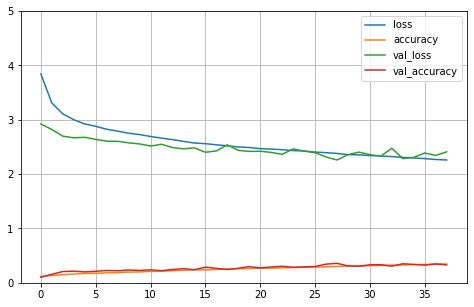

In [ ]:
pd.DataFrame(history_SGD.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)  
plt.show()

In [ ]:
os.listdir(checkpoint_dir_SGD)

## Saving the model and restoring

model_2_SGD.save('CNN_cifar_m2_2_SGD.h5') 
model_new_2_SGD = tf.keras.models.load_model("CNN_cifar_m2_2_SGD.h5")

loss_new_2_SGD, acc_new_2_SGD = model_new_2_SGD.evaluate(test_images, y_test_tf, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc_new_2_SGD))

313/313 - 2s - loss: 2.3928 - accuracy: 0.3335 - 2s/epoch - 5ms/step
Restored model, accuracy: 33.35%


In [ ]:
# Get Model Predictions for test data
# Predict the values from the validation dataset
y_pred_SGD = model_new_2_SGD.predict(test_images)
print(y_pred_SGD)
# Convert predictions classes to one hot vectors 
y_pred_classes_SGD = np.argmax(y_pred_SGD,axis = 1) 
print(y_pred_classes_SGD)
# Convert validation observations to one hot vectors
y_true_SGD = np.argmax(y_test_tf,axis = 1)
print(y_true_SGD)

[[2.80809077e-03 2.28036148e-03 1.09450303e-01 ... 1.19673898e-02
  3.15657374e-03 3.98898777e-03]
 [1.74130931e-01 1.23983115e-01 1.07527897e-03 ... 8.52928351e-05
  6.39968812e-01 6.01270162e-02]
 [1.89082697e-01 1.48593694e-01 1.48383761e-02 ... 2.47339974e-03
  5.36277652e-01 9.03750584e-02]
 ...
 [4.65902919e-03 8.02233350e-04 1.08943984e-01 ... 1.36493012e-01
  9.81363817e-04 1.43440266e-03]
 [2.17525270e-02 1.40959360e-02 1.39118344e-01 ... 1.83258448e-02
  2.73823421e-02 1.96657404e-02]
 [3.31533444e-03 9.44311789e-04 1.27472788e-01 ... 2.45487615e-02
  1.65893801e-03 2.27734912e-03]]
[6 8 8 ... 5 6 6]
[3 8 8 ... 5 1 7]


In [ ]:
np.array(classes)[y_pred_classes_SGD]

np.array(classes)[y_true_SGD]

## Metrics for Performance of the trained model

cnn_accuracy_cifar_SGD = metrics.accuracy_score(y_true_SGD, y_pred_classes_SGD)
print("Accuracy score is: {:5.2f}%".format(100*cnn_accuracy_cifar_SGD))

cnn_metricsreport_cifar_SGD = metrics.classification_report(y_true_SGD, y_pred_classes_SGD)
print("Classification report with various metrics is given by:")
print(cnn_metricsreport_cifar_SGD)

Accuracy score is: 33.35%
Classification report with various metrics is given by:
              precision    recall  f1-score   support

           0       0.65      0.30      0.41      1000
           1       0.55      0.49      0.52      1000
           2       0.25      0.07      0.11      1000
           3       0.29      0.08      0.13      1000
           4       0.16      0.25      0.20      1000
           5       0.54      0.20      0.29      1000
           6       0.23      0.94      0.37      1000
           7       0.65      0.14      0.22      1000
           8       0.42      0.71      0.53      1000
           9       0.61      0.17      0.27      1000

    accuracy                           0.33     10000
   macro avg       0.44      0.33      0.30     10000
weighted avg       0.44      0.33      0.30     10000



### AdaDelta Optimizer

In [ ]:
def create_model_2_Adadelta():
 
 model_2 = Sequential()
 
 model_2.add(Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay), input_shape=input_shape))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(32, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.2))
 
 model_2.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.3))
 
 model_2.add(Conv2D(128, (3,3), padding='same',activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
 model_2.add(BatchNormalization())
 model_2.add(MaxPooling2D(pool_size=(2,2)))
 model_2.add(Dropout(0.4))
 
 model_2.add(Flatten())
 model_2.add(Dense(y_train_tf.shape[1], activation='softmax'))
 

 model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adadelta(learning_rate=l_r), metrics=['accuracy'])

 return model_2

In [ ]:
model_2_Adadelta = create_model_2_Adadelta()

In [ ]:
checkpoint_path_Adadelta = "training_2_Adadelta/cp.ckpt"
checkpoint_dir_Adadelta = os.path.dirname(checkpoint_path_Adadelta)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path_Adadelta,
                                                 save_weights_only=True,
                                                 verbose=1)
es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience = 10, verbose=1, mode='auto')



# Train the model with the new callback
history_Adadelta = model_2_Adadelta.fit(train_images, 
          y_train_tf,  
          validation_split = 0.2,
          verbose=1,
          epochs=100,
          batch_size=128, 
          callbacks=[cp_callback,es],
          shuffle= True) 

Epoch 1/100
312/313 [============================>.] - ETA: 0s - loss: 4.5529 - accuracy: 0.1115
Epoch 1: saving model to training_2_Adadelta/cp.ckpt
313/313 [==============================] - 7s 19ms/step - loss: 4.5536 - accuracy: 0.1115 - val_loss: 2.5496 - val_accuracy: 0.1065
Epoch 2/100
310/313 [============================>.] - ETA: 0s - loss: 4.1718 - accuracy: 0.1234
Epoch 2: saving model to training_2_Adadelta/cp.ckpt
313/313 [==============================] - 5s 17ms/step - loss: 4.1713 - accuracy: 0.1234 - val_loss: 2.5799 - val_accuracy: 0.1396
Epoch 3/100
310/313 [============================>.] - ETA: 0s - loss: 3.9621 - accuracy: 0.1334
Epoch 3: saving model to training_2_Adadelta/cp.ckpt
313/313 [==============================] - 5s 17ms/step - loss: 3.9604 - accuracy: 0.1337 - val_loss: 2.5454 - val_accuracy: 0.1672
Epoch 4/100
310/313 [============================>.] - ETA: 0s - loss: 3.8110 - accuracy: 0.1449
Epoch 4: saving model to training_2_Adadelta/cp.ckpt
313/

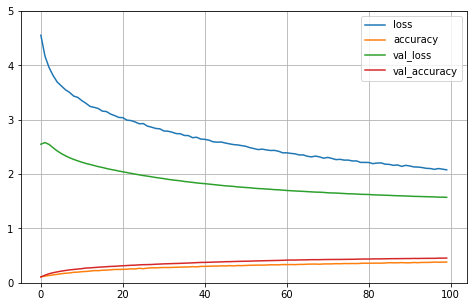

In [ ]:
pd.DataFrame(history_Adadelta.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,5)  
plt.show()

In [ ]:
os.listdir(checkpoint_dir_Adadelta)

## Saving the model and restoring

model_2_Adadelta.save('CNN_cifar_m2_2_Adadelta.h5') 
model_new_2_Adadelta = tf.keras.models.load_model("CNN_cifar_m2_2_Adadelta.h5")

loss_new_2_Adadelta, acc_new_2_Adadelta = model_new_2_Adadelta.evaluate(test_images, y_test_tf, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc_new_2_Adadelta))



313/313 - 1s - loss: 1.5457 - accuracy: 0.4587 - 1s/epoch - 4ms/step
Restored model, accuracy: 45.87%


In [ ]:
# Get Model Predictions for test data
# Predict the values from the validation dataset
y_pred_Adadelta = model_new_2_Adadelta.predict(test_images)
print(y_pred_Adadelta)
# Convert predictions classes to one hot vectors 
y_pred_classes_Adadelta = np.argmax(y_pred_Adadelta,axis = 1) 
print(y_pred_classes_Adadelta)
# Convert validation observations to one hot vectors
y_true_Adadelta = np.argmax(y_test_tf,axis = 1)
print(y_true_Adadelta)

np.array(classes)[y_pred_classes_Adadelta]
np.array(classes)[y_true_Adadelta]

[[2.2451740e-02 2.2513545e-03 1.0503836e-01 ... 7.4091204e-04
  8.4694035e-02 5.5314664e-04]
 [1.5369006e-02 5.5154544e-01 6.3476975e-05 ... 3.2546177e-05
  3.8055998e-01 5.2307107e-02]
 [1.3147150e-01 5.2108601e-02 2.2242684e-03 ... 1.4685953e-04
  8.0933410e-01 2.7403894e-03]
 ...
 [2.5710929e-03 1.1801537e-03 9.7771488e-02 ... 1.6624340e-01
  1.3590092e-03 6.1704852e-03]
 [1.8056858e-02 4.9031544e-02 5.1902365e-02 ... 6.2280372e-02
  2.4970095e-03 2.1958493e-02]
 [8.2118716e-03 3.8261786e-03 7.3945500e-02 ... 4.6751279e-01
  2.3439471e-03 1.1521767e-02]]
[3 1 8 ... 3 6 7]
[3 8 8 ... 5 1 7]


array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

In [ ]:
## Metrics for Performance of the trained model

cnn_accuracy_cifar_Adadelta = metrics.accuracy_score(y_true_Adadelta, y_pred_classes_Adadelta)
print("Accuracy score is: {:5.2f}%".format(100*cnn_accuracy_cifar_Adadelta))

cnn_metricsreport_cifar_Adadelta = metrics.classification_report(y_true_Adadelta, y_pred_classes_Adadelta)
print("Classification report with various metrics is given by:")
print(cnn_metricsreport_cifar_Adadelta)

Accuracy score is: 45.87%
Classification report with various metrics is given by:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1000
           1       0.62      0.56      0.59      1000
           2       0.38      0.24      0.29      1000
           3       0.40      0.19      0.25      1000
           4       0.30      0.57      0.39      1000
           5       0.47      0.31      0.37      1000
           6       0.38      0.61      0.47      1000
           7       0.56      0.47      0.51      1000
           8       0.51      0.70      0.59      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [ ]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Optimizer', 'Accuracy in %'], ['Adam',cnn_accuracy_cifar_adam*100 ], ['SGD', cnn_accuracy_cifar_SGD*100], ['Adadelta', cnn_accuracy_cifar_Adadelta*100]])
print(t.draw())

+-----------+---------------+
| Optimizer | Accuracy in % |
+===========+===============+
| Adam      | 82.480        |
+-----------+---------------+
| SGD       | 33.350        |
+-----------+---------------+
| Adadelta  | 45.870        |
+-----------+---------------+


## Takeaways from the assignment

1.  As shown, Adam optimizer performs the best among the three optimizers with 
   model 2. There are many optimizers available in the literature, which may or may not perform well for the dataset and the loss function. (https://paperswithcode.com/sota/image-classification-on-cifar-10)
2. There are various loss functions as well like `SparseCategoricalCrossentropy`, `MSE`, `Binary Log Loss` etc. So, with different loss functions, there may or may not be better results for one or more optimizers. Moreover, it also depends on the data as well which loss function to choose, since the data can either be categorical or continuous.
3. As mentioned before, large number of neurons and layers does not always guarantee higher accuracy. Using more layers and neurons might lead to overfitting/underfitting of the data in question.  
4. Futhermore, paramaters like number of epochs, strides, number of filters in the CNN etc. also play a cruical role in getting the performance of a model.